<a href="https://colab.research.google.com/github/enochbayode/BCSMASS-DUSMASS/blob/main/DSN_Hackathon_file_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Data/Microsoft x dsn

Mounted at /content/drive
/content/drive/MyDrive/Data/Microsoft x dsn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the datasets using pandas

Train_set = pd.read_csv('Train Dataset .csv')
Test_set = pd.read_csv('Test Dataset.csv')

In [5]:
Train_set.head(6)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
5,13835,69,1,3,164,280,0,0,88,0,5.0,0,0,0,0


In [6]:
Train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        7303 non-null   int64  
 1   age       7303 non-null   int64  
 2   sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [7]:
Train_set.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


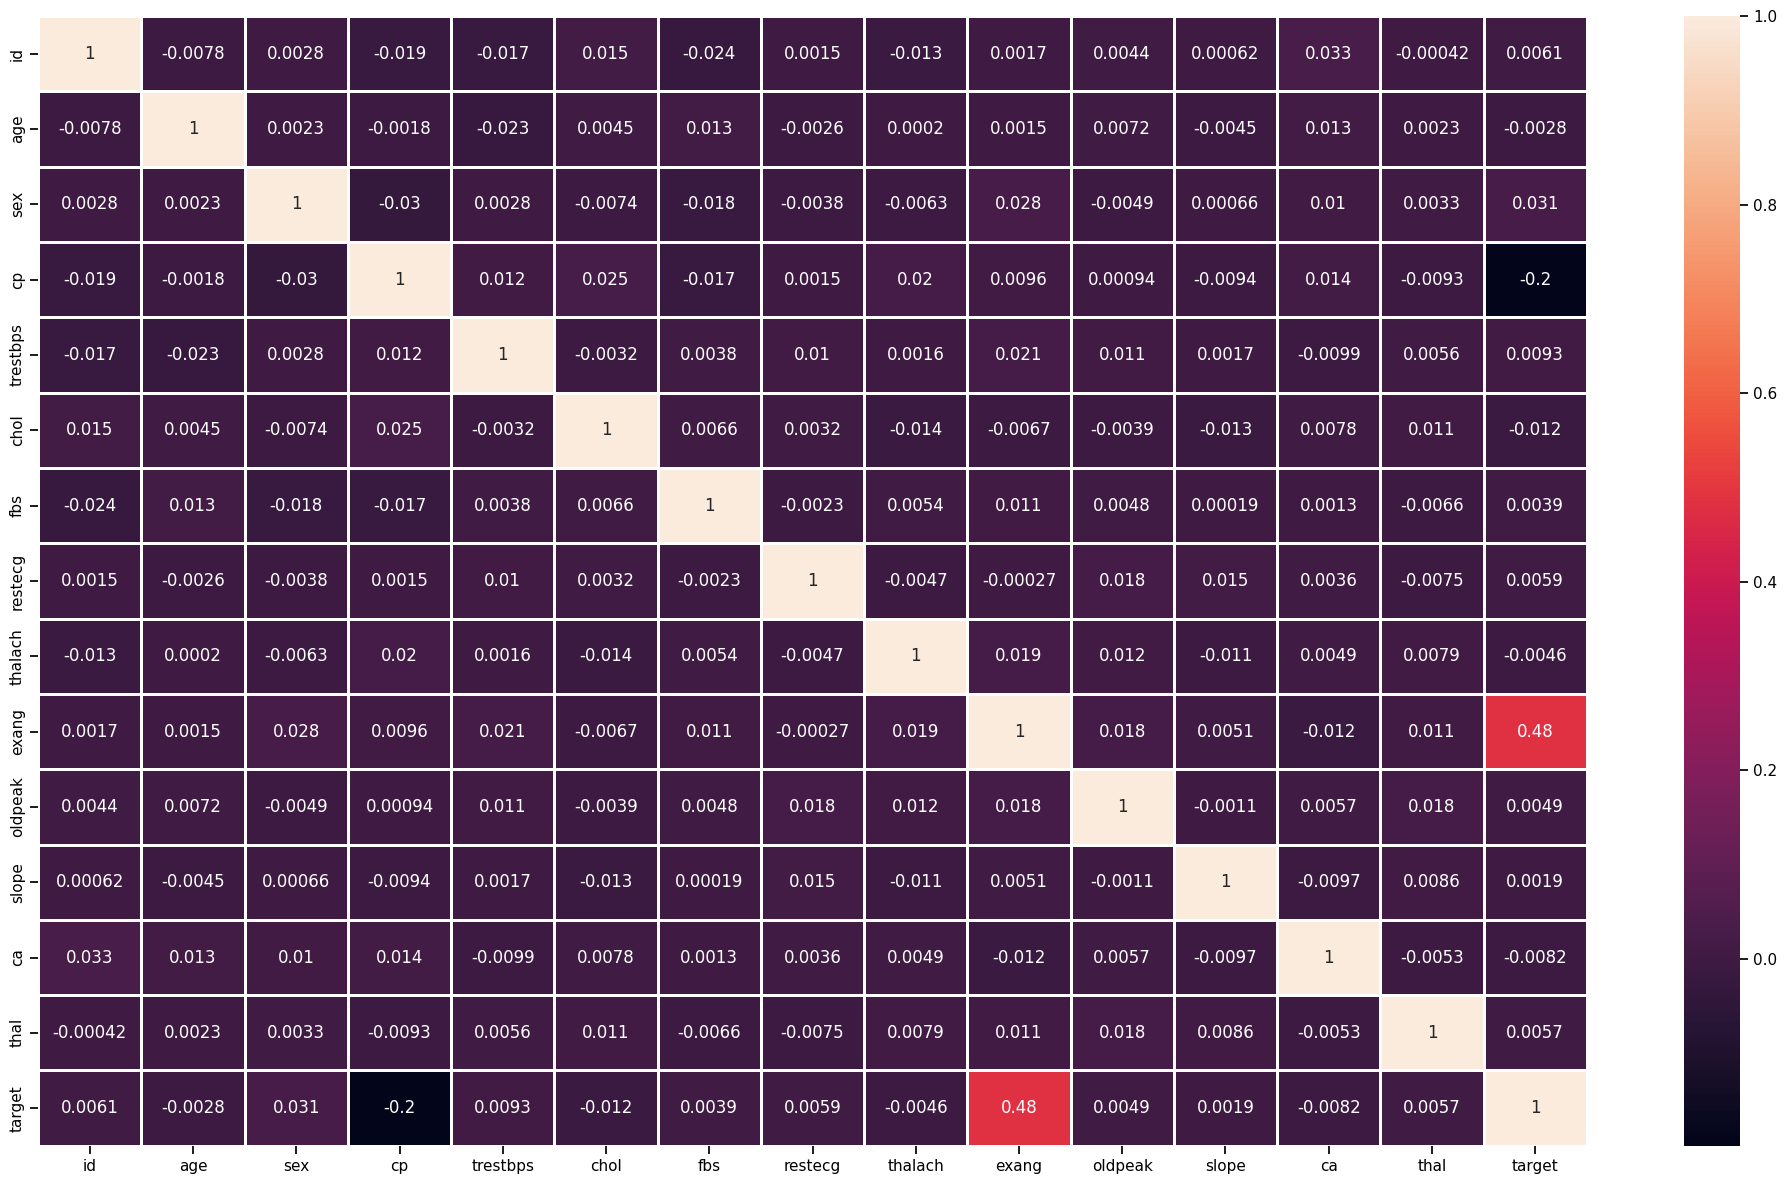

In [8]:
# checking the correlation between the dataset

plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.0)
sns.heatmap(Train_set.corr(), annot=True, linewidth =2)
plt.tight_layout()

In [9]:
# --- Seperating Dependent Features ---
x = Train_set.drop(['target'], axis=1)
y = Train_set['target']

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler # import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
# --- Numerical Pipeline ---
num_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_column = ['cp', 'slope', 'thal']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# --- Combine Both Pipelines into Transformer ---
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_column)
    , ('numerical', num_pipeline, num_column)]
    , remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Apply to Dataframe ---
x_train_process = process_pipeline.fit_transform(x)
x_test_process = process_pipeline.fit_transform(Test_set)

In [22]:
print (x_train_process)

[[1. 0. 0. ... 0. 0. 4.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 3.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 2. 1. 1.]
 [0. 0. 0. ... 1. 1. 4.]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42,
                                  n_estimators=7
                                  )

rf_model.fit(x, y)

# Make predictions
y_pred_RF = rf_model.predict(Test_set)

print (y_pred_RF)

[1 1 1 ... 1 1 1]


In [24]:
# Load the submission Excel file
#file_path = 'path_to_existing_file.xlsx'  # Replace with your actual file path
df = pd.read_csv('Sample Submission.csv')

#'target' is the name of the empty column where you need to insert predictions
df['target'] = y_pred  # Replace 'Target' with the actual column name

# Save the updated DataFrame back to the Excel file
df.to_csv('RF_class_RF017.csv', index=False)